In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
tf.config.run_functions_eagerly(True)

#custom imports
from src.processors.Preprocessor import Preprocessor


2023-06-05 15:54:11.427396: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-05 15:54:11.536087: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 15:54:14.534765: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
DATA_PATH = '/projects/p31961/dopamine_modeling/data/prototype_data/mouse_909_DA_avoid.parquet.gzip'
data = pd.read_parquet(DATA_PATH)
data.head()

,day,time,trial,signal,event_avoid,sensor_DA
2,7,-24.998034,0,-0.522248,1,1
3,7,-24.997051,0,-0.522132,1,1
5,7,-24.995085,0,-0.521610,1,1
8,7,-24.992136,0,-0.520076,1,1
9,7,-24.991152,0,-0.519359,1,1


<Axes: xlabel='time'>

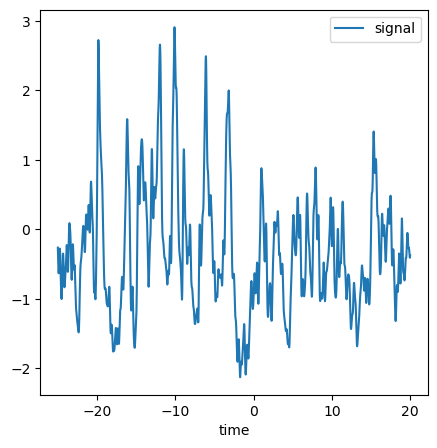

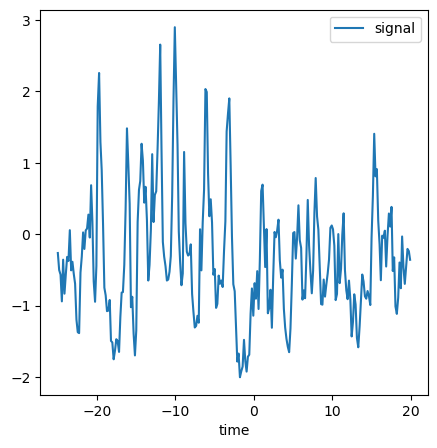

In [14]:
trial_1 = data.query('trial==1')
trial_ds = trial_1[::100]
trial_1.plot(x='time', y='signal', figsize=(5,5))
trial_ds.plot(x='time', y='signal', figsize=(5,5))

In [18]:
# memmory usage
size_reduction = trial_ds.memory_usage(deep=True).sum() / trial_1.memory_usage(deep=True).sum()
print(size_reduction*100)

1.0018455048774058
